# Histograms from Scratch

Histograms are arguably the most useful plot in data science.

Funny thing is, they're really just a frequency bar chart.

Matplotlib has a histogram function, but ever wondered how to make it from scratch?

Let me show you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
column = np.random.normal(mu, sigma, 1000)

Making use of the bar functionality in matplotlib, we'll accomplish our task with 2 simple functions.

The first function get_bins. It takes two arguments, value_counts and bins, and returns an array of evenly spaced numbers over a specified interval. 

The second function my_hist takes three arguments, col, bins, and width, and returns a histogram plot of the input data. It uses the get_bins function to calculate the bin intervals and the frequency of values in each bin. The plot shows the frequency of values in each bin on the y-axis and the bin intervals on the x-axis.

In [3]:
def get_bins(value_counts, bins):
    offset = 1e-6
    start = value_counts.min()-offset
    stop = value_counts.max()+offset
    return np.linspace(start=start, stop=stop, num=bins+1)

def my_hist(col, bins=50, width=0.03):
    freq = []
    values, counts = np.unique(col, return_counts=True)
    bin_intervals = get_bins(values, bins=bins)
    for interval in zip(bin_intervals[:-1], bin_intervals[1:]):
        greater_equal_than_min = (values >= min(interval))
        less_than_max = (values < max(interval))
        freq.append(counts[greater_equal_than_min & less_than_max].sum())
    
    freq = np.array(freq)
    plt.bar(bin_intervals[1:], freq, width=width)
    return freq, bin_intervals

And tadaa! Our histogram looks like matplotlib's and even returns the same arrays!

(array([ 14,  34, 102, 178, 217, 211, 155,  62,  16,  11], dtype=int64),
 array([-0.297836  , -0.23654969, -0.17526337, -0.11397706, -0.05269075,
         0.00859557,  0.06988188,  0.13116819,  0.19245451,  0.25374082,
         0.31502713]))

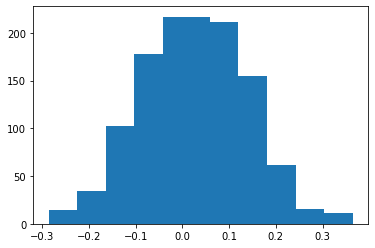

In [5]:
my_hist(column, bins=10, width=0.1)

(array([ 14.,  34., 102., 178., 217., 211., 155.,  62.,  16.,  11.]),
 array([-0.297835  , -0.23654889, -0.17526277, -0.11397666, -0.05269055,
         0.00859557,  0.06988168,  0.13116779,  0.19245391,  0.25374002,
         0.31502613]),
 <BarContainer object of 10 artists>)

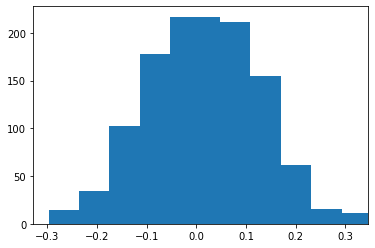

In [4]:
plt.hist(column, bins=10, width=0.1)